In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
car_df = pd.read_csv('../../data/cars.csv')

In [5]:
brand_df = pd.read_csv('../../data/brand.csv')

In [6]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [7]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [9]:
brand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


In [10]:
car_df["Brand"] = car_df["title"].str.split().str[0]

In [11]:
merged_left = car_df.merge(brand_df, left_on="Brand", right_on="title", how="left").drop(columns=["title_y"])
merged_left.rename(columns={"title_x": "title"}, inplace=True)

In [12]:
print(merged_left)   # 1. cars.csv와 brand.csv의 데이터 합치기

               title  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
1     VAUXHALL CORSA   1495           88585               2008   
2        HYUNDAI I30    949          137000               2011   
3         MINI HATCH   2395           96731               2010   
4     VAUXHALL CORSA   1000           85000               2013   
...              ...    ...             ...                ...   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback   1.2L  Manual

In [14]:
merged_inner = car_df.merge(brand_df, left_on="Brand", right_on="title", how="inner").drop(columns=["title_y"])
merged_inner.rename(columns={"title_x": "title"}, inplace=True)

In [15]:
print(merged_inner)

Empty DataFrame
Columns: [title, Price, Mileage(miles), Registration_Year, Previous Owners, Fuel type, Body type, Engine, Gearbox, Doors, Seats, Emission Class, Service history, Brand, country]
Index: []


In [16]:
merged_outer = car_df.merge(brand_df, left_on="Brand", right_on="title", how="outer").drop(columns=["title_y"])
merged_outer.rename(columns={"title_x": "title"}, inplace=True)

In [17]:
print(merged_outer)

            title   Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA FABIA  6900.0         70189.0             2016.0              3.0   
1     SKODA FABIA  6900.0         70189.0             2016.0              3.0   
2     SKODA FABIA  1990.0        150000.0             2007.0              2.0   
3     SKODA FABIA  1995.0         84000.0             2008.0              NaN   
4     SKODA FABIA  2495.0        124138.0             2011.0              3.0   
...           ...     ...             ...                ...              ...   
3730          NaN     NaN             NaN                NaN              NaN   
3731          NaN     NaN             NaN                NaN              NaN   
3732          NaN     NaN             NaN                NaN              NaN   
3733          NaN     NaN             NaN                NaN              NaN   
3734          NaN     NaN             NaN                NaN              NaN   

     Fuel type  Body type E

In [18]:
merged_right = car_df.merge(brand_df, left_on="Brand", right_on="title", how="right").drop(columns=["title_y"])
merged_right.rename(columns={"title_x": "title"}, inplace=True)

In [19]:
print(merged_right)

   title  Price  Mileage(miles)  Registration_Year  Previous Owners Fuel type  \
0    NaN    NaN             NaN                NaN              NaN       NaN   
1    NaN    NaN             NaN                NaN              NaN       NaN   
2    NaN    NaN             NaN                NaN              NaN       NaN   
3    NaN    NaN             NaN                NaN              NaN       NaN   
4    NaN    NaN             NaN                NaN              NaN       NaN   
5    NaN    NaN             NaN                NaN              NaN       NaN   
6    NaN    NaN             NaN                NaN              NaN       NaN   
7    NaN    NaN             NaN                NaN              NaN       NaN   
8    NaN    NaN             NaN                NaN              NaN       NaN   
9    NaN    NaN             NaN                NaN              NaN       NaN   
10   NaN    NaN             NaN                NaN              NaN       NaN   
11   NaN    NaN             

In [20]:
print("Left Join:", merged_left.shape)

Left Join: (3687, 15)


In [21]:
print("Inner Join:", merged_inner.shape)

Inner Join: (0, 15)


In [22]:
print("Outer Join:", merged_outer.shape)
print("Right Join:", merged_right.shape)

Outer Join: (3735, 15)
Right Join: (48, 15)


In [23]:
print(merged_left)

               title  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
1     VAUXHALL CORSA   1495           88585               2008   
2        HYUNDAI I30    949          137000               2011   
3         MINI HATCH   2395           96731               2010   
4     VAUXHALL CORSA   1000           85000               2013   
...              ...    ...             ...                ...   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback   1.2L  Manual

In [24]:
car_df["Brand"] = car_df["title"].str.split().str[0].str.upper()

In [25]:
print(car_df[["title", "Brand"]].head(10))

            title     Brand
0     SKODA FABIA     SKODA
1  VAUXHALL CORSA  VAUXHALL
2     HYUNDAI I30   HYUNDAI
3      MINI HATCH      MINI
4  VAUXHALL CORSA  VAUXHALL
5   HYUNDAI COUPE   HYUNDAI
6      FORD FOCUS      FORD
7  VAUXHALL CORSA  VAUXHALL
8       VOLVO 740     VOLVO
9     PEUGEOT 207   PEUGEOT


In [26]:
unique_engines = car_df["Engine"].unique()

In [27]:
print(unique_engines)

['1.4L' '1.2L' '1.3L' '2.0L' '1.6L' '2.3L' '1.8L' '1.0L' '3.0L' '1.5L'
 '1.9L' '2.4L' '2.2L' '3.5L' '3.2L' '2.5L' '1.1L' '3.1L' '3.7L' '2.6L'
 '2.1L' '2.8L' '5.0L' '0.8L' '2.7L' '1.7L' '0.9L' '4.2L' nan '4.4L' '4.3L'
 '3.3L' '5.5L' '4.8L' '6.3L']


In [28]:
unique_emission_classes = car_df["Emission Class"].unique()
print(unique_emission_classes)

['Euro 6' 'Euro 4' 'Euro 5' nan 'Euro 3' 'Euro 2' 'Euro 1']


In [29]:
from sklearn.preprocessing import LabelEncoder    
# LabelEncoder
le_engine = LabelEncoder()
le_emission = LabelEncoder()
# Engine과 Emission Class 변수를 숫자로 변환     #2. 카테고리형 변수를 숫자 형태로 변환하기
car_df["Engine_Encoded"] = le_engine.fit_transform(car_df["Engine"].astype(str))Emission_Class_Encoded
car_df["Emission_Class_Encoded"] = le_emission.fit_transform(car_df["Emission Class"].astype(str))

In [30]:
print(car_df[["Engine", "Engine_Encoded", "Emission Class", "Emission_Class_Encoded"]].head(10))

  Engine  Engine_Encoded Emission Class  Emission_Class_Encoded
0   1.4L               6         Euro 6                       5
1   1.2L               4         Euro 4                       3
2   1.4L               6         Euro 5                       4
3   1.4L               6         Euro 4                       3
4   1.3L               5         Euro 5                       4
5   2.0L              12         Euro 4                       3
6   1.6L               8         Euro 4                       3
7   1.2L               4         Euro 4                       3
8   2.3L              15            NaN                       6
9   1.6L               8         Euro 4                       3


In [31]:
print(car_df[["Engine", "Engine_Encoded", "Emission Class", "Emission_Class_Encoded"]].tail(10))

     Engine  Engine_Encoded Emission Class  Emission_Class_Encoded
3677   2.7L              19            NaN                       6
3678   3.7L              26         Euro 3                       2
3679   2.2L              14         Euro 2                       1
3680   1.4L               6         Euro 4                       3
3681   1.6L               8         Euro 4                       3
3682   1.6L               8         Euro 4                       3
3683   2.0L              12         Euro 5                       4
3684   2.0L              12         Euro 5                       4
3685   2.2L              14         Euro 4                       3
3686   1.2L               4         Euro 5                       4


In [32]:
new_car_df = car_df.dropna(subset=["Engine", "Emission Class"])  #NaN있는 행을 삭제후 new_car_df에저장
print(new_car_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3599 entries, 0 to 3686
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3599 non-null   object 
 1   Price                   3599 non-null   int64  
 2   Mileage(miles)          3599 non-null   int64  
 3   Registration_Year       3599 non-null   int64  
 4   Previous Owners         2243 non-null   float64
 5   Fuel type               3599 non-null   object 
 6   Body type               3599 non-null   object 
 7   Engine                  3599 non-null   object 
 8   Gearbox                 3599 non-null   object 
 9   Doors                   3599 non-null   float64
 10  Seats                   3593 non-null   float64
 11  Emission Class          3599 non-null   object 
 12  Service history         534 non-null    object 
 13  Brand                   3599 non-null   object 
 14  Engine_Encoded          3599 non-null   

In [33]:
print(new_car_df[["Engine", "Engine_Encoded", "Emission Class", "Emission_Class_Encoded"]].tail(10))

     Engine  Engine_Encoded Emission Class  Emission_Class_Encoded
3676   1.6L               8         Euro 6                       5
3678   3.7L              26         Euro 3                       2
3679   2.2L              14         Euro 2                       1
3680   1.4L               6         Euro 4                       3
3681   1.6L               8         Euro 4                       3
3682   1.6L               8         Euro 4                       3
3683   2.0L              12         Euro 5                       4
3684   2.0L              12         Euro 5                       4
3685   2.2L              14         Euro 4                       3
3686   1.2L               4         Euro 5                       4


In [34]:
print(new_car_df[["Engine", "Engine_Encoded", "Emission Class", "Emission_Class_Encoded"]].head(10))

   Engine  Engine_Encoded Emission Class  Emission_Class_Encoded
0    1.4L               6         Euro 6                       5
1    1.2L               4         Euro 4                       3
2    1.4L               6         Euro 5                       4
3    1.4L               6         Euro 4                       3
4    1.3L               5         Euro 5                       4
5    2.0L              12         Euro 4                       3
6    1.6L               8         Euro 4                       3
7    1.2L               4         Euro 4                       3
9    1.6L               8         Euro 4                       3
10   1.6L               8         Euro 4                       3


In [35]:
print(car_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3687 non-null   object 
 1   Price                   3687 non-null   int64  
 2   Mileage(miles)          3687 non-null   int64  
 3   Registration_Year       3687 non-null   int64  
 4   Previous Owners         2276 non-null   float64
 5   Fuel type               3687 non-null   object 
 6   Body type               3687 non-null   object 
 7   Engine                  3642 non-null   object 
 8   Gearbox                 3687 non-null   object 
 9   Doors                   3662 non-null   float64
 10  Seats                   3652 non-null   float64
 11  Emission Class          3600 non-null   object 
 12  Service history         540 non-null    object 
 13  Brand                   3687 non-null   object 
 14  Engine_Encoded          3687 non-null   

In [36]:
car_df["Engine_Encoded"] = car_df["Engine"].str.replace("L", "", regex=True).astype(float)

In [37]:
car_df["Emission_Class_Encoded"] = car_df["Emission Class"].str.replace("Euro ", "", regex=True).astype(float)

In [38]:
print(car_df[["Engine", "Engine_Encoded", "Emission Class", "Emission_Class_Encoded"]].head(10))

  Engine  Engine_Encoded Emission Class  Emission_Class_Encoded
0   1.4L             1.4         Euro 6                     6.0
1   1.2L             1.2         Euro 4                     4.0
2   1.4L             1.4         Euro 5                     5.0
3   1.4L             1.4         Euro 4                     4.0
4   1.3L             1.3         Euro 5                     5.0
5   2.0L             2.0         Euro 4                     4.0
6   1.6L             1.6         Euro 4                     4.0
7   1.2L             1.2         Euro 4                     4.0
8   2.3L             2.3            NaN                     NaN
9   1.6L             1.6         Euro 4                     4.0


In [39]:
print(car_df[["Engine", "Engine_Encoded", "Emission Class", "Emission_Class_Encoded"]].tail(10))

     Engine  Engine_Encoded Emission Class  Emission_Class_Encoded
3677   2.7L             2.7            NaN                     NaN
3678   3.7L             3.7         Euro 3                     3.0
3679   2.2L             2.2         Euro 2                     2.0
3680   1.4L             1.4         Euro 4                     4.0
3681   1.6L             1.6         Euro 4                     4.0
3682   1.6L             1.6         Euro 4                     4.0
3683   2.0L             2.0         Euro 5                     5.0
3684   2.0L             2.0         Euro 5                     5.0
3685   2.2L             2.2         Euro 4                     4.0
3686   1.2L             1.2         Euro 5                     5.0


In [40]:
renew_car_df = car_df.dropna(subset=["Engine_Encoded", "Emission_Class_Encoded"])    #null값의 행 삭제 하여 renew_car_df에 저장

In [41]:
print(renew_car_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3599 entries, 0 to 3686
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3599 non-null   object 
 1   Price                   3599 non-null   int64  
 2   Mileage(miles)          3599 non-null   int64  
 3   Registration_Year       3599 non-null   int64  
 4   Previous Owners         2243 non-null   float64
 5   Fuel type               3599 non-null   object 
 6   Body type               3599 non-null   object 
 7   Engine                  3599 non-null   object 
 8   Gearbox                 3599 non-null   object 
 9   Doors                   3599 non-null   float64
 10  Seats                   3593 non-null   float64
 11  Emission Class          3599 non-null   object 
 12  Service history         534 non-null    object 
 13  Brand                   3599 non-null   object 
 14  Engine_Encoded          3599 non-null   

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
renew_car_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Engine_Encoded,Emission_Class_Encoded
count,3599.000000,3.599000e+03,3599.000000,2243.000000,3599.000000,3593.000000,3599.000000,3599.000000
mean,5789.254515,8.152794e+04,2011.930258,2.807847,4.316755,4.898692,1.603779,4.909975
std,4512.333738,3.956275e+04,4.778109,1.543335,0.988103,0.575368,0.485650,0.910813
min,400.000000,1.000000e+00,1992.000000,1.000000,2.000000,2.000000,0.800000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000,1.300000,4.000000
50%,3999.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000,1.600000,5.000000
75%,7999.000000,1.032000e+05,2016.000000,4.000000,5.000000,5.000000,1.900000,6.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000,6.300000,6.000000


In [44]:
#결측치 개수 및 비율
missing_count = renew_car_df.isnull().sum()
# 결측치 비율 
missing_ratio = (renew_car_df.isnull().sum() / len(car_df)) * 100
# 결측치 개수 및 비율을 데이터프레임에
missing_data = pd.DataFrame({"Missing Count": missing_count, "Missing Ratio (%)": missing_ratio})
# 결측치 개수 및 비율 출력
print(missing_data)

                        Missing Count  Missing Ratio (%)
title                               0           0.000000
Price                               0           0.000000
Mileage(miles)                      0           0.000000
Registration_Year                   0           0.000000
Previous Owners                  1356          36.777868
Fuel type                           0           0.000000
Body type                           0           0.000000
Engine                              0           0.000000
Gearbox                             0           0.000000
Doors                               0           0.000000
Seats                               6           0.162734
Emission Class                      0           0.000000
Service history                  3065          83.129916
Brand                               0           0.000000
Engine_Encoded                      0           0.000000
Emission_Class_Encoded              0           0.000000


In [47]:
# Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거
renew_car_df = renew_car_df.copy()
renew_car_df["Service history"].fillna("Unknown", inplace=True)
threshold = 2  # 허용할 수 있는 최대 결측치 개수 2
renew_car_df = renew_car_df.dropna(thresh=renew_car_df.shape[1] - threshold)

In [48]:
print(renew_car_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3599 entries, 0 to 3686
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3599 non-null   object 
 1   Price                   3599 non-null   int64  
 2   Mileage(miles)          3599 non-null   int64  
 3   Registration_Year       3599 non-null   int64  
 4   Previous Owners         2243 non-null   float64
 5   Fuel type               3599 non-null   object 
 6   Body type               3599 non-null   object 
 7   Engine                  3599 non-null   object 
 8   Gearbox                 3599 non-null   object 
 9   Doors                   3599 non-null   float64
 10  Seats                   3593 non-null   float64
 11  Emission Class          3599 non-null   object 
 12  Service history         3599 non-null   object 
 13  Brand                   3599 non-null   object 
 14  Engine_Encoded          3599 non-null   

In [49]:
from sklearn.preprocessing import StandardScaler
# StandardScaler
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(renew_car_df.select_dtypes(include=[np.number]))
# 데이터프레임 저장
renew_car_df_standard = pd.DataFrame(scaled_standard, columns=renew_car_df.select_dtypes(include=[np.number]).columns)
print(renew_car_df_standard.head())

      Price  Mileage(miles)  Registration_Year  Previous Owners     Doors  \
0  0.246192       -0.286646           0.851866         0.124533  0.691568   
1 -0.951803        0.178401          -0.822670         0.772625 -1.332794   
2 -1.072821        1.402323          -0.194719              NaN  0.691568   
3 -0.752322        0.384331          -0.404036         1.420717 -1.332794   
4 -1.061517        0.087773           0.223915              NaN  0.691568   

      Seats  Engine_Encoded  Emission_Class_Encoded  
0  0.176100       -0.419659                1.196926  
1  0.176100       -0.831535               -0.999218  
2  0.176100       -0.419659                0.098854  
3 -1.562161       -0.419659               -0.999218  
4  0.176100       -0.625597                0.098854  


In [50]:
renew_car_df_standard.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Engine_Encoded,Emission_Class_Encoded
count,3.599000e+03,3.599000e+03,3.599000e+03,2.243000e+03,3.599000e+03,3.593000e+03,3.599000e+03,3.599000e+03
mean,1.263538e-16,1.105596e-16,1.615749e-14,1.393842e-16,1.658394e-16,6.555661e-16,-1.816336e-16,-3.158845e-17
std,1.000139e+00,1.000139e+00,1.000139e+00,1.000223e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00
min,-1.194505e+00,-2.060986e+00,-4.171740e+00,-1.171651e+00,-2.344974e+00,-5.038684e+00,-1.655289e+00,-4.293436e+00
25%,-7.312653e-01,-6.204661e-01,-8.226696e-01,-5.235589e-01,-1.332794e+00,1.760999e-01,-6.255971e-01,-9.992184e-01
50%,-3.968021e-01,-3.862595e-02,1.459810e-02,1.245330e-01,6.915677e-01,1.760999e-01,-7.782055e-03,9.885398e-02
75%,4.897804e-01,5.478657e-01,8.518658e-01,7.726250e-01,6.915677e-01,1.760999e-01,6.100330e-01,1.196926e+00
max,6.230623e+00,2.600211e+01,2.317084e+00,4.013085e+00,6.915677e-01,3.652623e+00,9.671320e+00,1.196926e+00


In [51]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(renew_car_df.select_dtypes(include=[np.number]))
# 데이터프레임 저장
renew_car_df_minmax = pd.DataFrame(scaled_minmax, columns=renew_car_df.select_dtypes(include=[np.number]).columns)
print(renew_car_df_minmax.head())

      Price  Mileage(miles)  Registration_Year  Previous Owners     Doors  \
0  0.194030        0.063227           0.774194            0.250  1.000000   
1  0.032687        0.079798           0.516129            0.375  0.333333   
2  0.016388        0.123412           0.612903              NaN  1.000000   
3  0.059552        0.087136           0.580645            0.500  0.333333   
4  0.017910        0.076569           0.677419              NaN  1.000000   

   Seats  Engine_Encoded  Emission_Class_Encoded  
0    0.6        0.109091                     1.0  
1    0.6        0.072727                     0.6  
2    0.6        0.109091                     0.8  
3    0.4        0.109091                     0.6  
4    0.6        0.090909                     0.8  


In [52]:
renew_car_df_minmax.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Engine_Encoded,Emission_Class_Encoded
count,3599.000000,3599.000000,3599.000000,2243.000000,3599.000000,3593.000000,3599.000000,3599.000000
mean,0.160873,0.073441,0.642912,0.225981,0.772252,0.579738,0.146142,0.781995
std,0.134697,0.035639,0.154133,0.192917,0.329368,0.115074,0.088300,0.182163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062388,0.051331,0.516129,0.125000,0.333333,0.600000,0.090909,0.600000
50%,0.107433,0.072065,0.645161,0.250000,1.000000,0.600000,0.145455,0.800000
75%,0.226836,0.092964,0.774194,0.375000,1.000000,0.600000,0.200000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
from sklearn.preprocessing import MaxAbsScaler
# MaxAbsScaler 
scaler_maxabs = MaxAbsScaler()
scaled_maxabs = scaler_maxabs.fit_transform(renew_car_df.select_dtypes(include=[np.number]))
# 데이터프레임 저장
renew_car_df_maxabs = pd.DataFrame(scaled_maxabs, columns=renew_car_df.select_dtypes(include=[np.number]).columns)
print(renew_car_df_maxabs.head())

      Price  Mileage(miles)  Registration_Year  Previous Owners  Doors  \
0  0.203540        0.063228           0.996540         0.333333    1.0   
1  0.044100        0.079799           0.992585         0.444444    0.6   
2  0.027994        0.123412           0.994068              NaN    1.0   
3  0.070649        0.087137           0.993574         0.555556    0.6   
4  0.029499        0.076570           0.995057              NaN    1.0   

      Seats  Engine_Encoded  Emission_Class_Encoded  
0  0.714286        0.222222                1.000000  
1  0.714286        0.190476                0.666667  
2  0.714286        0.222222                0.833333  
3  0.571429        0.222222                0.666667  
4  0.714286        0.206349                0.833333  


In [54]:
renew_car_df_maxabs.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Engine_Encoded,Emission_Class_Encoded
count,3599.000000,3.599000e+03,3599.000000,2243.000000,3599.000000,3593.000000,3599.000000,3599.000000
mean,0.170774,7.344197e-02,0.994528,0.311983,0.863351,0.699813,0.254568,0.818329
std,0.133107,3.563891e-02,0.002362,0.171482,0.197621,0.082195,0.077087,0.151802
min,0.011799,9.008197e-07,0.984676,0.111111,0.400000,0.285714,0.126984,0.166667
25%,0.073451,5.133231e-02,0.992585,0.222222,0.600000,0.714286,0.206349,0.666667
50%,0.117965,7.206558e-02,0.994563,0.333333,1.000000,0.714286,0.253968,0.833333
75%,0.235959,9.296460e-02,0.996540,0.444444,1.000000,0.714286,0.301587,1.000000
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


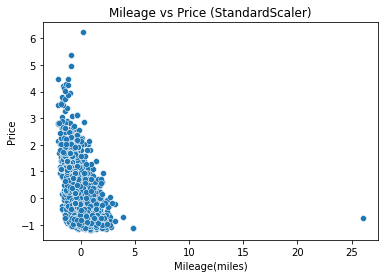

In [55]:
sns.scatterplot(x=renew_car_df_standard["Mileage(miles)"], y=renew_car_df_standard["Price"]) #주행거리 vs 가격
plt.title("Mileage vs Price (StandardScaler)")
plt.show()                                            # 주행거리가 많을수록 가격 하락

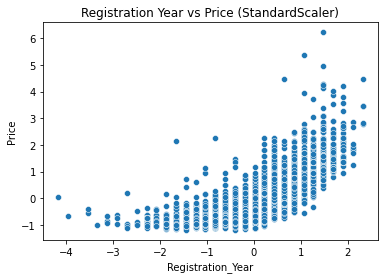

In [56]:
sns.scatterplot(x=renew_car_df_standard["Registration_Year"], y=renew_car_df_standard["Price"]) #등록연도 vs 가격
plt.title("Registration Year vs Price (StandardScaler)")
plt.show()                                                      #등록연도가 최근일수 록 가격 상승

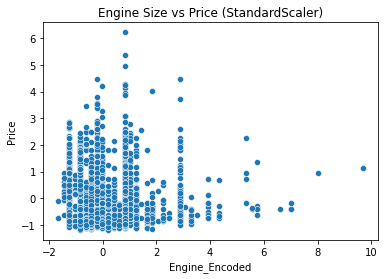

In [57]:
sns.scatterplot(x=renew_car_df_standard["Engine_Encoded"], y=renew_car_df_standard["Price"]) #배기랑 vs 가격
plt.title("Engine Size vs Price (StandardScaler)")                          
plt.show()                                                           # 가격0이하 삭제이후 재검토

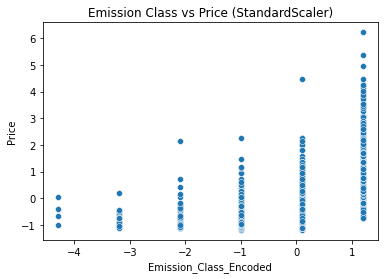

In [60]:
sns.scatterplot(x=renew_car_df_standard["Emission_Class_Encoded"], y=renew_car_df_standard["Price"]) #배출등급 vs 가격
plt.title("Emission Class vs Price (StandardScaler)")
plt.show()                                                     #배출 등급이 좋을수록 가격 상승

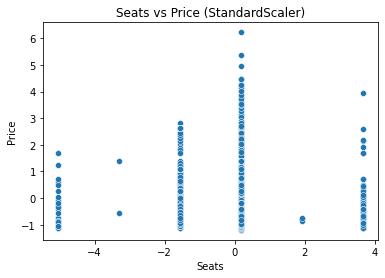

In [61]:
sns.scatterplot(x=renew_car_df_standard["Seats"], y=renew_car_df_standard["Price"]) #좌석수 vs 가격
plt.title("Seats vs Price (StandardScaler)")
plt.show()                                           #죄석수 0이하 삭제이후 검토필요

In [62]:
renew_car_df = renew_car_df[renew_car_df["Engine_Encoded"] > 0].copy()
print(renew_car_df["Engine_Encoded"].describe())

count    3599.000000
mean        1.603779
std         0.485650
min         0.800000
25%         1.300000
50%         1.600000
75%         1.900000
max         6.300000
Name: Engine_Encoded, dtype: float64


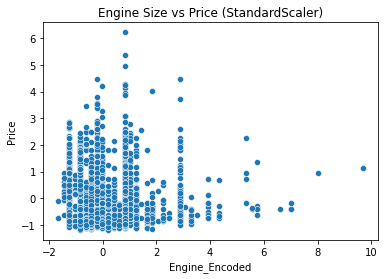

In [66]:
sns.scatterplot(x=renew_car_df_standard["Engine_Encoded"], y=renew_car_df_standard["Price"])
plt.title("Engine Size vs Price (StandardScaler)")            #Engine_Encoded 4이상, 가격4이상 삭제
plt.show()

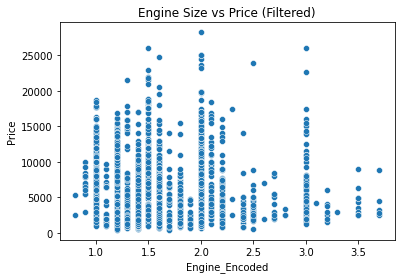

In [65]:
# Engine_Encoded 4 이상인 데이터 제거
renew_car_df = renew_car_df[renew_car_df["Engine_Encoded"] < 4].copy()
# 가격 30,000 이상인 데이터 제거
renew_car_df = renew_car_df[renew_car_df["Price"] < 30000].copy()

sns.scatterplot(x=renew_car_df["Engine_Encoded"], y=renew_car_df["Price"])
plt.title("Engine Size vs Price (Filtered)")
plt.show()                                   #Engine_Encoded와 가격과는 별다른 상관관계 찾기 어려움

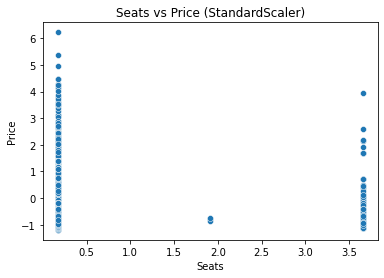

In [67]:
# Seats가 0 이하인 행 제거
renew_car_df_standard = renew_car_df_standard[renew_car_df_standard["Seats"] > 0].copy()
# 좌석 수 vs 가격
sns.scatterplot(x=renew_car_df_standard["Seats"], y=renew_car_df_standard["Price"])
plt.title("Seats vs Price (StandardScaler)")
plt.show()

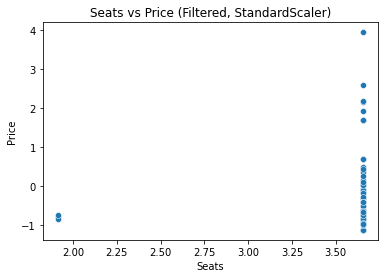

In [68]:
renew_car_df_standard = renew_car_df_standard[renew_car_df_standard["Seats"] > 0.5].copy()   #좌석수 0.5이하 삭제
# 좌석 수 vs 가격
sns.scatterplot(x=renew_car_df_standard["Seats"], y=renew_car_df_standard["Price"])
plt.title("Seats vs Price (Filtered, StandardScaler)")
plt.show()                              # 좌석수와 가격은 상관관계가 없는것으로 판단됨.

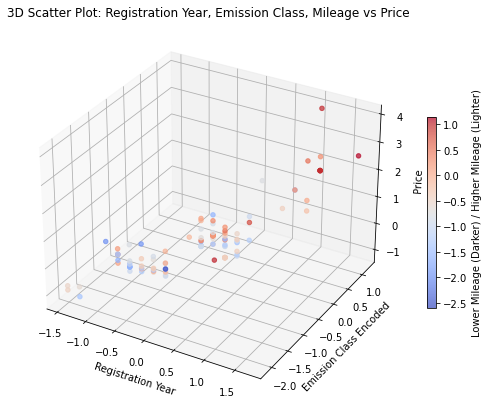

In [70]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# 3D Scatter Plot 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# 데이터 
x = renew_car_df_standard["Registration_Year"]  # 차량 연식
y = renew_car_df_standard["Emission_Class_Encoded"]  # 배출가스 등급
z = renew_car_df_standard["Price"]  # 가격
c = renew_car_df_standard["Mileage(miles)"]  # 주행거리 (색상으로 표현)
# 3D 산점도 
sc = ax.scatter(x, y, z, c=-c, cmap="coolwarm", alpha=0.7, s=20)
# 축 라벨 설정
ax.set_xlabel("Registration Year")
ax.set_ylabel("Emission Class Encoded")
ax.set_zlabel("Price")
ax.set_title("3D Scatter Plot: Registration Year, Emission Class, Mileage vs Price")
# 컬러바 추가 (주행거리)
cbar = fig.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label("Lower Mileage (Darker) / Higher Mileage (Lighter)")
plt.show()    

In [ ]:
# 등록연도가 최근, 배출가스 등급이 높은(친환경), 주행거리가 적을수록 차량가격이 높다.
# (특히 주행거리가 많을수록 가격이 떨어지는 경향이 높음)

In [71]:
country_brand_count = brand_df.groupby("country")["title"].nunique().reset_index()   #국가별 브랜드수
country_brand_count.columns = ["Country", "Total_Brands"]
print(country_brand_count)

           Country  Total_Brands
0   Czech Republic             1
1           France             4
2          Germany             6
3            Italy             4
4            Japan            11
5         Malaysia             1
6          Romania             1
7      South Korea             4
8            Spain             1
9           Sweden             2
10  United Kingdom             8
11   United States             5


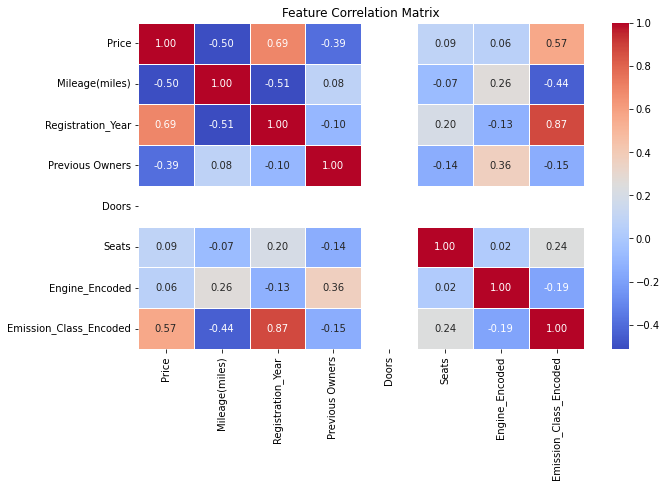

In [72]:
# 숫자형 변수만 선택
numeric_cols = renew_car_df_standard.select_dtypes(include=[np.number])
# 상관계수 행렬 계산
corr_matrix = numeric_cols.corr()
# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
#연식 Registration_Year 높을수록 차량 가격이 상승하는 경향이 강함 (0.69)
#주행거리가 많을수록(Mileage(miles)) 가격이 낮아지는 경향이 있음 (-0.50)
#배출가스 등급(Emission_Class_Encoded)이 높을수록(친환경?) 가격이 상승하는 경향이 있음 (0.57)